Импортираме основните библиотеки
os — работа с файлове и пътища
numpy, pandas — обработка на данни
matplotlib — визуализации
Задаваме глобални настройки за графиките
по-широка фигура (10 × 5)
мрежа на графиките по подразбиране
Посочваме местоположението на датасета
директорията data/
конкретен CSV файл
сглобяваме пълния път до файла
Отпечатваме кой файл ще се зарежда
– за да е ясно какъв точно датасет анализираме.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Глобални настройки за графики
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

DATA_DIR = "data"
FILENAME = "learning_dataset_uid70_P0086H01_I002_Ptot_with_poa.csv"  # смени, ако е нужно
PATH = os.path.join(DATA_DIR, FILENAME)

print("Файл с данни:", PATH)


Файл с данни: data\learning_dataset_uid70_P0086H01_I002_Ptot_with_poa.csv


Четем CSV файла (pd.read_csv)
колоната time се парсва автоматично като datetime.
това позволява лесни операции върху време (час, ден, групиране и т.н.)
Отпечатваме размера на таблицата
в случая: 7034 реда × 21 колони, което е типично за 15-минутен времеви резолюционен датасет за няколко дни.
Показваме първите 5 реда
Това ни дава бърз преглед на:
времевия диапазон (time, date, hour)
метео данни (temp_c, cloud)
целевата променлива (power_kw)
спецификация на системата (latitude, longitude, tilt, azimuth, размери на модулите и др.)

In [2]:
# Клетка 2: зареждаме learning dataset

df = pd.read_csv(PATH, parse_dates=["time"])
print("Размер на таблицата:", df.shape)
display(df.head())


Размер на таблицата: (7034, 21)


,time,date,hour,minute,dayofyear,temp_c,cloud,power_kw,tag,sm_user_object_id,...,longitude,tilt,azimuth,module_length,module_width,module_efficiency,total_panels,commissioning_date,degradation_rate,clearsky_poa
0,2025-01-31 05:30:00,2025-01-31,5,30,31,9.2,33.0,5.147287,P0086H01/I002/Ptot,70,...,27.451342,15.0,NaN,2278.0,1134.0,21.2,172,2020-01-01,0.55,NaN
1,2025-01-31 05:45:00,2025-01-31,5,45,31,9.2,33.0,306.941863,P0086H01/I002/Ptot,70,...,27.451342,15.0,NaN,2278.0,1134.0,21.2,172,2020-01-01,0.55,NaN
2,2025-01-31 06:00:00,2025-01-31,6,0,31,8.8,56.0,412.689934,P0086H01/I002/Ptot,70,...,27.451342,15.0,NaN,2278.0,1134.0,21.2,172,2020-01-01,0.55,NaN
3,2025-01-31 06:15:00,2025-01-31,6,15,31,8.8,56.0,949.100783,P0086H01/I002/Ptot,70,...,27.451342,15.0,NaN,2278.0,1134.0,21.2,172,2020-01-01,0.55,NaN
4,2025-01-31 06:30:00,2025-01-31,6,30,31,8.8,56.0,1073.821667,P0086H01/I002/Ptot,70,...,27.451342,15.0,NaN,2278.0,1134.0,21.2,172,2020-01-01,0.55,NaN


1. Описателна статистика (df.describe().T)

Извеждаме статистика само за числовите колони, което включва:

min, max — реални граници на наблюденията

mean — средна стойност

25%, 50%, 75% — квартилни стойности

std — стандартно отклонение (вариативност)

Основни изводи от таблицата:

Данните покриват 7034 записа — достатъчни за базов модел.

Температурата (temp_c) варира от –12.4°C до 34°C.

Облачността (cloud) покрива пълния диапазон 0–100%, което е важно за обучение.

Производството (power_kw) има голям диапазон — от почти 0 до 73 kW, което е нормално за фотоволтаици.

Геопозицията (ширина/дължина) и конструктивните параметри са константи за целия датасет — това е очаквано, тъй като панелите не се местят.

clearsky_poa е напълно NaN — ще трябва да бъде изчислен отделно чрез pvlib.

✔️ 2. Извеждане на типовете колони (df.dtypes)

Това помага да проверим:

дали датите са правилно парснати като datetime64

дали числовите колони не са записани като object

дали има колони, които изискват корекция преди обучение

🎯 Виждаме, че типизацията е коректна и датата/часът са в нужните формати.

In [3]:
# Клетка 3: обща статистика и типове

print("Описателна статистика (само числови колони):")
display(df.describe().T)

print("\nТипове на колоните:")
print(df.dtypes)


Описателна статистика (само числови колони):


,count,mean,min,25%,50%,75%,max,std
time,7034,2025-04-15 19:05:50.454932992,2025-01-31 05:30:00,2025-03-13 12:48:45,2025-04-17 08:37:30,2025-05-20 17:11:15,2025-06-21 07:45:00,NaN
hour,7034.0,10.181831,3.0,7.0,10.0,13.0,18.0,3.724297
minute,7034.0,22.31234,0.0,0.0,15.0,30.0,45.0,16.76302
dayofyear,7034.0,105.355985,31.0,72.0,107.0,140.0,172.0,40.171392
temp_c,7034.0,13.114989,-12.4,7.1,13.6,19.4,34.1,8.843139
cloud,7034.0,37.509975,0.0,6.0,25.0,72.75,100.0,35.918003
power_kw,7034.0,23442.949457,0.022727,6562.19555,21734.055333,38093.60825,73396.553333,17990.628667
sm_user_object_id,7034.0,70.0,70.0,70.0,70.0,70.0,70.0,0.0
latitude,7034.0,43.151251,43.151251,43.151251,43.151251,43.151251,43.151251,0.0
longitude,7034.0,27.451342,27.451342,27.451342,27.451342,27.451342,27.451342,0.0



Типове на колоните:
time                  datetime64[ns]
date                          object
hour                           int64
minute                         int64
dayofyear                      int64
temp_c                       float64
cloud                        float64
power_kw                     float64
tag                           object
sm_user_object_id              int64
latitude                     float64
longitude                    float64
tilt                         float64
azimuth                      float64
module_length                float64
module_width                 float64
module_efficiency            float64
total_panels                   int64
commissioning_date            object
degradation_rate             float64
clearsky_poa                 float64
dtype: object


In [4]:

# Клетка 4: проверка за липсващи стойности

missing = df.isna().sum().sort_values(ascending=False)
print("Брой липсващи стойности по колони:")
display(missing.to_frame("missing_count"))

print("\nПроцент липсващи стойности (топ 10):")
display((missing / len(df) * 100).head(10))


Брой липсващи стойности по колони:


,missing_count
clearsky_poa,7034
azimuth,7034
hour,0
date,0
time,0
dayofyear,0
minute,0
temp_c,0
cloud,0
sm_user_object_id,0



Процент липсващи стойности (топ 10):


clearsky_poa         100.0
azimuth              100.0
hour                   0.0
date                   0.0
time                   0.0
dayofyear              0.0
minute                 0.0
temp_c                 0.0
cloud                  0.0
sm_user_object_id      0.0
dtype: float64

In [5]:
# Клетка 5: добавяме удобни времеви признаци

df["date"] = df["time"].dt.date
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["dayofyear"] = df["time"].dt.dayofyear
df["month"] = df["time"].dt.month
df["weekday"] = df["time"].dt.weekday  # 0 = понеделник, 6 = неделя

display(df[["time", "date", "hour", "dayofyear", "month", "weekday"]].head())


,time,date,hour,dayofyear,month,weekday
0,2025-01-31 05:30:00,2025-01-31,5,31,1,4
1,2025-01-31 05:45:00,2025-01-31,5,31,1,4
2,2025-01-31 06:00:00,2025-01-31,6,31,1,4
3,2025-01-31 06:15:00,2025-01-31,6,31,1,4
4,2025-01-31 06:30:00,2025-01-31,6,31,1,4


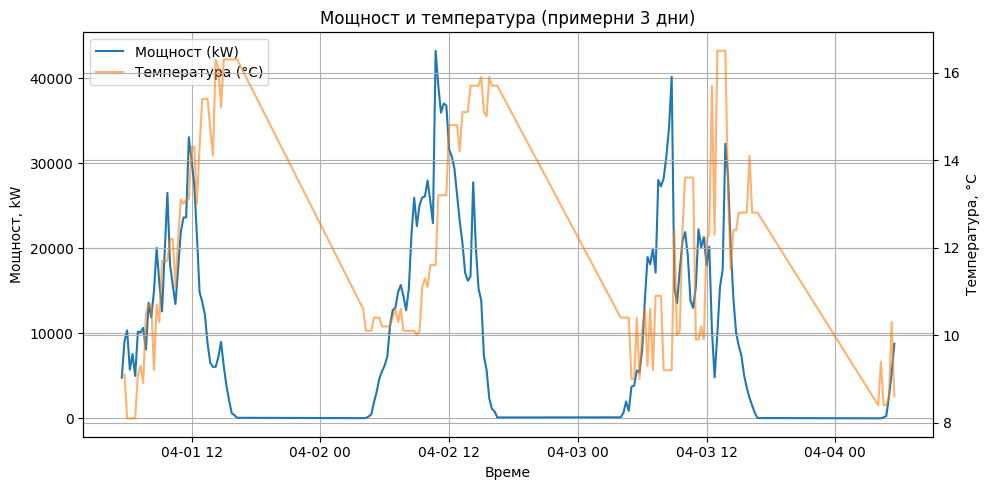

In [6]:
# Клетка 6: графика на мощността за малък интервал от време

# взимаме 3 дни от средата на периода, за да не е твърде дълго
start = df["time"].min() + pd.Timedelta(days=60)
end   = start + pd.Timedelta(days=3)

mask = (df["time"] >= start) & (df["time"] <= end)
df_sample = df[mask].copy()

fig, ax1 = plt.subplots()

ax1.plot(df_sample["time"], df_sample["power_kw"], label="Мощност (kW)")
ax1.set_xlabel("Време")
ax1.set_ylabel("Мощност, kW")

# втори y-axis за температурата
ax2 = ax1.twinx()
ax2.plot(df_sample["time"], df_sample["temp_c"], color="tab:orange", alpha=0.6, label="Температура (°C)")
ax2.set_ylabel("Температура, °C")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title("Мощност и температура (примерни 3 дни)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ежедневни агрегати:


,date,energy_kwh,max_power_kw,mean_temp_c,mean_cloud
0,2025-01-31,53574.414375,13604.303667,11.072500,60.725000
1,2025-02-01,49057.147192,17539.256000,9.210000,53.925000
2,2025-02-02,90541.796151,29671.190000,7.120000,26.400000
3,2025-02-03,23165.862433,5974.085333,4.197500,93.225000
4,2025-02-04,127035.538544,35457.959667,1.640476,45.880952


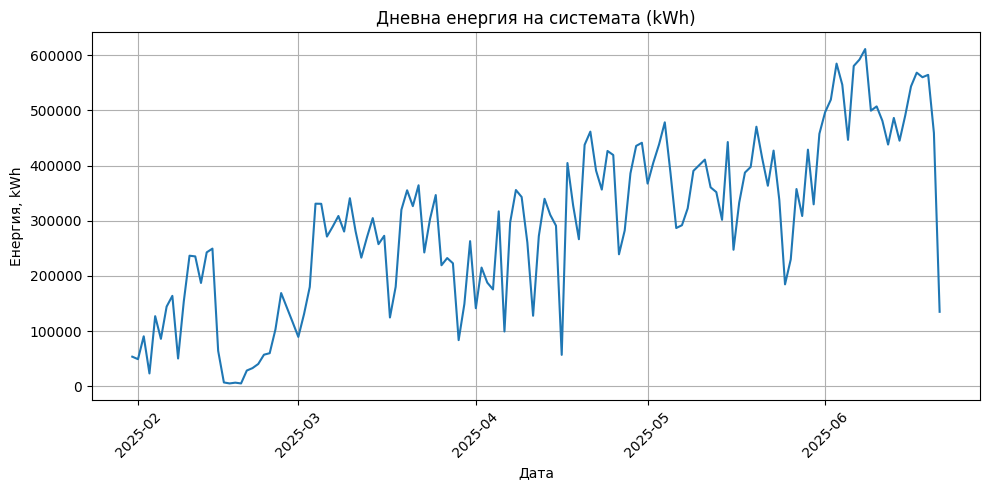

In [7]:
# Клетка 7: агрегиране по дни – енергия, максимум, средна облачност и температура

df_day = df.copy()

# енергия за 15-минутен интервал: power_kw * 0.25 часа
df_day["energy_kwh"] = df_day["power_kw"] * 0.25

daily = df_day.groupby("date").agg(
    energy_kwh=("energy_kwh", "sum"),
    max_power_kw=("power_kw", "max"),
    mean_temp_c=("temp_c", "mean"),
    mean_cloud=("cloud", "mean"),
).reset_index()

print("Ежедневни агрегати:")
display(daily.head())

# графика на дневната енергия
plt.figure()
plt.plot(daily["date"], daily["energy_kwh"])
plt.title("Дневна енергия на системата (kWh)")
plt.xlabel("Дата")
plt.ylabel("Енергия, kWh")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


В тази клетка визуализираме как се променят мощността на фотоволтаичната система и температурата на въздуха в рамките на три последователни дни. Това е важна стъпка, тъй като дава интуитивно разбиране за връзката между метеорологичните условия и реалната електропроизводство.

✔️ Какво правим тук:

Избираме примерен интервал от 3 дни
Интервалът се взима спрямо най-ранната дата в данните, за да илюстрира реален фрагмент от работата на инсталацията.

Извеждаме две оси:

лява y-ос — мощност (kW)

дясна y-ос — температура (°C)

Чертани са две линии:

синя линия — произведена мощност

оранжева линия — температура

✔️ Какво показва графиката:

Мощността ясно следва дневния слънчев цикъл — нула през нощта, покачване сутрин, пик около обяд и спад вечер.

Температурата има плавно денонощно течение, което често следва, но леко изостава от слънчевата радиация.

Вижда се, че по-високата температура често води до спад в мощността, защото PV модулите работят по-неефективно при прегряване — важен физически ефект.

Дните са различни — напълно нормално заради различната облачност. Това ще помогне на модела да научи зависимостите.

Корелации между числовите признаци:


,power_kw,temp_c,cloud,hour,dayofyear
power_kw,1.000000,0.385532,-0.244834,-0.089504,0.419687
temp_c,0.385532,1.000000,-0.159069,0.413064,0.729055
cloud,-0.244834,-0.159069,1.000000,0.034899,-0.071106
hour,-0.089504,0.413064,0.034899,1.000000,0.046749
dayofyear,0.419687,0.729055,-0.071106,0.046749,1.000000


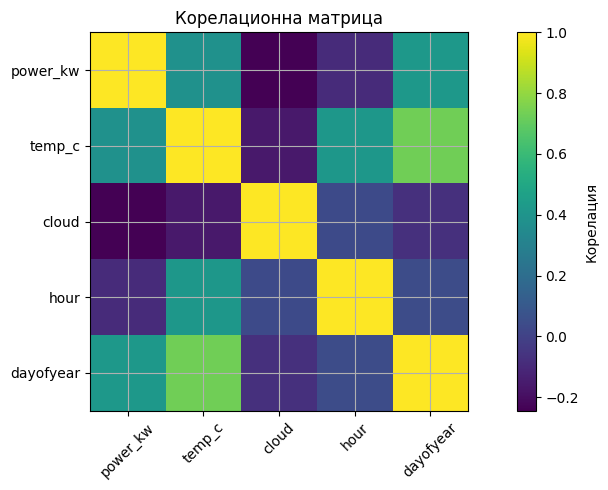

In [8]:
# Клетка 8: корелационна матрица

num_cols = ["power_kw", "temp_c", "cloud", "hour", "dayofyear"]
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()

print("Корелации между числовите признаци:")
display(corr)

plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label="Корелация")
plt.title("Корелационна матрица")
plt.tight_layout()
plt.show()


In [ ]:
✔️ Основни наблюдения
1. temp_c ↗ power_kW — умерена положителна корелация (+0.38)
Това показва, че при по-висока температура системата средно произвежда повече енергия.
Но зависимостта не е силна, което е логично — панелите прегряват и губят ефективност.
Температурата повишава мощността само защото тя следва дневния цикъл (по-топло → повече слънце).

Извод: температурата е полезна фича, но не ключова.

2. cloud ↘ power_kW — умерена отрицателна корелация (–0.24)

Колкото е по-висока облачността, толкова по-ниска е произведената мощност.
Въпреки че корелацията не е много висока, тя е стабилна — облаците реално намаляват слънчевата радиация.

Извод: облачността е по-важна от температурата и е задължителен вход за модела.

3. dayofyear ↗ power_kW — умерена корелация (+0.42)

Това е сезонният фактор — лятото слънцето е по-високо и произвеждаме повече енергия.
Корелацията е ясна, но не линейна — моделът ще я улови само ако я включим като входна характеристика (day of year или sin/cos трансформация).

Извод: сезонността е важна — трябва да я включим в ML модела.

4. hour ↗ temp_c и hour ↗ power_kW

Часът на деня е естествен скрит фактор:

сутрин → ниска мощност и ниска температура

обед → високи стойности

вечер → спад

Корелациите са умерени и логични.

Извод: “hour” е важен за модели, които трябва да улавят дневния цикъл.

5. temp_c ↗ dayofyear — силна корелация (+0.73)

Температурата силно следва сезонността — лятото е по-топло.

Важно:
За модела това означава, че temp_c съдържа част от сезонността — трябва да внимаваме с мултиколинеарност при сложни модели.
Но за невронна мрежа това не е проблем.

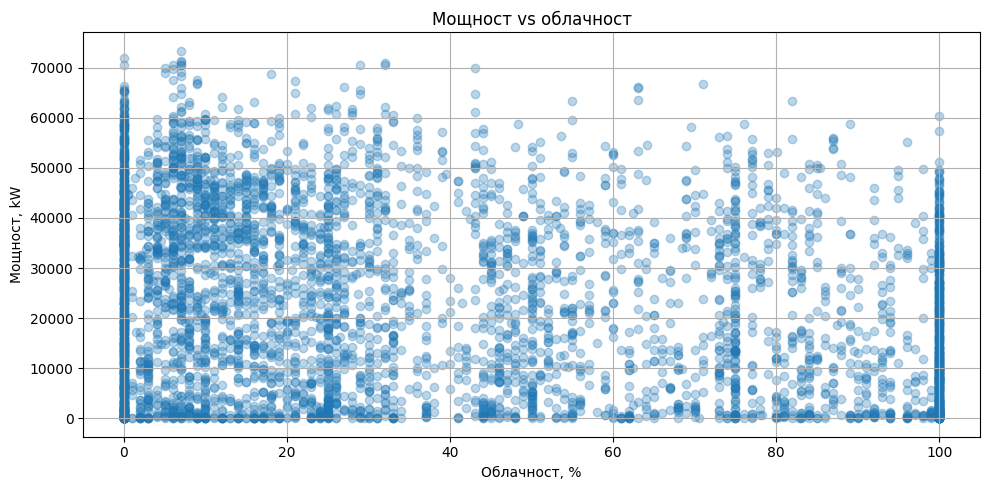

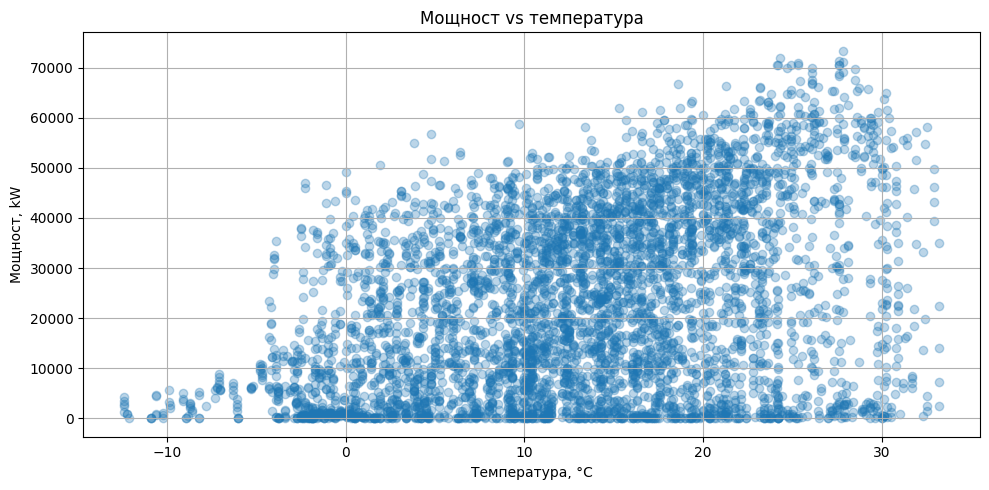

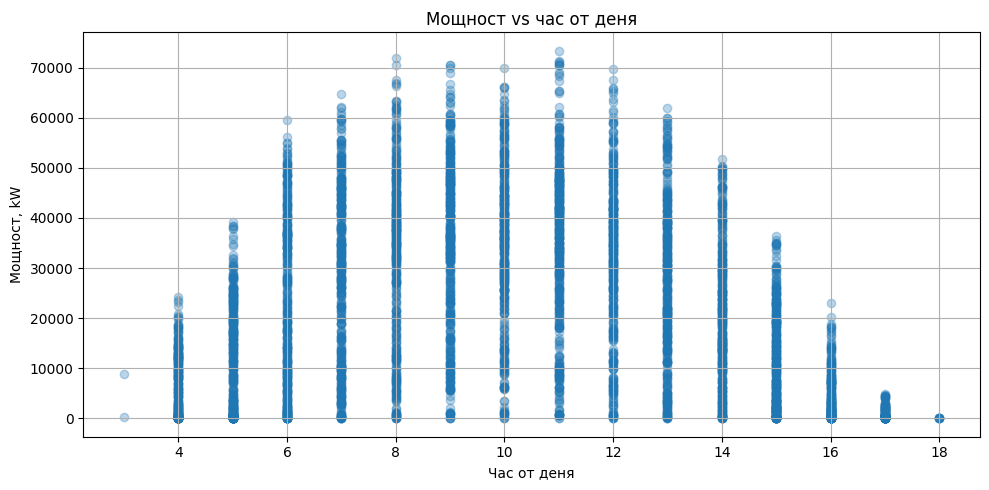

In [9]:
# Клетка 9: scatter plot-и за връзките с мощността

sample = df.sample(n=min(5000, len(df)), random_state=42)

# Мощност vs облачност
plt.figure()
plt.scatter(sample["cloud"], sample["power_kw"], alpha=0.3)
plt.xlabel("Облачност, %")
plt.ylabel("Мощност, kW")
plt.title("Мощност vs облачност")
plt.tight_layout()
plt.show()

# Мощност vs температура
plt.figure()
plt.scatter(sample["temp_c"], sample["power_kw"], alpha=0.3)
plt.xlabel("Температура, °C")
plt.ylabel("Мощност, kW")
plt.title("Мощност vs температура")
plt.tight_layout()
plt.show()

# Мощност по час от деня
plt.figure()
plt.scatter(sample["hour"], sample["power_kw"], alpha=0.3)
plt.xlabel("Час от деня")
plt.ylabel("Мощност, kW")
plt.title("Мощност vs час от деня")
plt.tight_layout()
plt.show()


In [ ]:
1. Мощност vs облачност

Графиката показва силно разпръснати точки, но се забелязват ясни тенденции:

Максималните мощности се постигат при ниска или нулева облачност (0–10%).

При висока облачност (80–100%) мощността почти винаги пада към нулата – очаквано, тъй като облаците блокират директната слънчева радиация.

В диапазона 20–60% се наблюдава голяма вариативност – няколко фактора (ъгъл на слънцето, температура, сезон) влияят едновременно.

📌 Извод: Облачността е важен, но не единствен фактор. Корелацията е умерена отрицателна – подходяща като входен параметър за модела.

2. Мощност vs температура

Тук зависимостта е по-сложна и нелинейна:

При ниски температури (под 0°C) мощността е ниска, тъй като слънцето през зимата е ниско, а денят е къс.

С повишаване на температурата до около 20–25°C мощността нараства – това е съвпадение на висока слънчева радиация и умерени температури.

След около 25–30°C се появява леко намаляване и по-голям шум – нормално, защото PV панелите губят ефективност при прегряване.

📌 Извод: Температурата има средна положителна корелация с мощността, но влиянието е нелинейно (има оптимална зона). Тя е полезна фича, но не определя всичко.

3. Мощност vs час от деня

Тук връзката е най-ясна:

Почти цялата мощност се генерира между 6:00 и 18:00.

Пикът е между 10:00 – 14:00, с плавно покачване сутрин и спад вечер.

Формата е близка до "камбана" — типична за слънчевата радиация през деня.

📌 Извод: Часът е един от най-силните предиктори.
Тази зависимост подчертава необходимостта моделът да има времеви признаци (hour, dayofyear, is_daylight).